In [1]:
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import gzip
import os, sys

In [2]:
import gzip
import numpy as np
import pandas as pd
from sklearn import datasets, model_selection
from matplotlib import pyplot as plt
from matplotlib import cm

In [3]:
with gzip.open('../data/fashion-mnist/train-images-idx3-ubyte.gz', 'rb') as f:
    mnist_data = np.frombuffer(f.read(), np.uint8, offset=16)

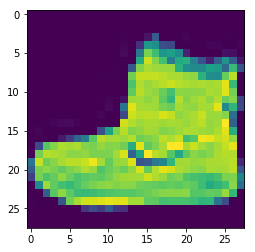

(60000, 784)


In [4]:
    mnist_data = mnist_data.reshape(-1,784)
    plt.imshow(mnist_data[0].reshape(28,28))
    plt.show()
    print(mnist_data.shape)

In [5]:
mnist_data = mnist_data / 255
pd.DataFrame(mnist_data)

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
1,0.0,0.0,0.000000,0.000000,0.000000,0.003922,0.000000,0.000000,0.000000,0.000000,...,0.466667,0.447059,0.509804,0.298039,0.000000,0.000000,0.000000,0.000000,0.0,0.0
2,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.086275,...,0.000000,0.000000,0.003922,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
3,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.129412,0.376471,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
4,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
5,0.0,0.0,0.000000,0.000000,0.003922,0.000000,0.000000,0.000000,0.000000,0.086275,...,0.000000,0.000000,0.000000,0.000000,0.521569,0.654902,0.286275,0.000000,0.0,0.0
6,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
7,0.0,0.0,0.000000,0.000000,0.000000,0.003922,0.003922,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.011765,0.000000,0.321569,0.929412,0.905882,0.274510,0.0,0.0
8,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
9,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0


In [6]:
with gzip.open('../data/fashion-mnist/train-labels-idx1-ubyte.gz', 'rb') as f:
    mnist_label = np.frombuffer(f.read(), np.uint8, offset=8)
mnist_label.shape

(60000,)

In [7]:
train_size = 5000
test_size = 500 
train_X, test_X, train_Y, test_Y = model_selection.train_test_split(mnist_data, mnist_label, train_size=train_size, test_size=test_size)

In [8]:
train_X = train_X.reshape((len(train_X), 1, 28, 28))
test_X = test_X.reshape((len(test_Y), 1, 28, 28))

In [9]:
train_X = torch.from_numpy(train_X).float()
train_Y = torch.from_numpy(train_Y).long()
test_X = torch.from_numpy(test_X).float()
test_Y = torch.from_numpy(test_Y).long()

In [10]:
train = TensorDataset(train_X, train_Y)
train_loader = DataLoader(train, batch_size=100, shuffle=True)

In [11]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(256,64)
        self.fc2 = nn.Linear(64,10)
        
    def forward(self, x):
        x = F.max_pool2d(F.relu(self.conv1(x)), 2)
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, 256) # 16 x 16 to 256
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return F.log_softmax(x)

model = Net().cuda()

In [12]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

for epoch in range(1000):
    total_loss = 0
    
    for train_x, train_y in train_loader:
        train_x, train_y = Variable(train_x.cuda()), Variable(train_y.cuda())
        optimizer.zero_grad()
        output = model(train_x)
        loss = criterion(output, train_y)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    if (epoch+1) % 100 == 0:
        print(epoch+1, total_loss)

c:\users\jinsoo\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  from ipykernel import kernelapp as app


100 23.89512199163437
200 17.15408866107464
300 13.35415804386139
400 9.71604223549366
500 6.412407670170069
600 4.498568337410688
700 3.6596218179911375
800 1.285912950988859
900 0.5039290245622396
1000 0.2917489509563893


In [13]:
test_x, test_y = Variable(test_X.cuda()), Variable(test_Y.cuda())
result = torch.max(model(test_x).data, 1)[1]
accuracy = sum(test_y.cpu().data.numpy() == result.cpu().numpy()) / len(test_y.cpu().data.numpy())
accuracy

c:\users\jinsoo\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  from ipykernel import kernelapp as app


0.856